In [1]:
import os


import tensorflow as tf

In [2]:
import numpy as np
import keras
from tensorflow.keras import layers

In [3]:
import matplotlib.pyplot as plt

In [4]:

def make_linear_model(D):

    input_layer = keras.layers.Input((D,))

    linear_layer = keras.layers.Dense(1)(input_layer)

    output_layer = keras.layers.Activation('sigmoid')(linear_layer)

    model = keras.models.Model(input_layer,output_layer)

    model.compile(loss='binary_crossentropy')

    return model




In [5]:
# def make_linear_model(D):
#     # Define the input shape
#     input_layer = keras.layers.Input(shape=(D,))

#     # Add a linear (Dense) layer with 1 output neuron
#     linear_layer = keras.layers.Dense(1)(input_layer)

#     # Use sigmoid activation function for binary classification
#     output_layer = keras.layers.Activation('sigmoid')(linear_layer)

#     # Create the model
#     model = keras.models.Model(inputs=input_layer, outputs=output_layer)

#     # Compile the model with binary crossentropy loss and an optimizer
#     model.compile(optimizer='adam', loss='binary_crossentropy')

#     return model

In [14]:
D = 10  # Number of features
model = make_linear_model(D)

In [5]:
#data

inputs = np.random.random((1000, D))  # 1000 samples, D features each
labels = np.random.randint(0, 2, (1000, 1))  # 1000 binary labels

In [6]:
#actual data import
stimulus = np.load('ProcAiryData/inpfull_op50_SF.npz')
Y_full = np.load('ProcAiryData/Yfull_op50_SF.npz')

In [7]:
stimulus_concat = np.concatenate([stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)
Y_full_concat = np.concatenate([Y_full['arr_0'],
                         Y_full['arr_1'],
                         Y_full['arr_2'],
                         Y_full['arr_3'] , Y_full['arr_4'], Y_full['arr_5'], Y_full['arr_6']], axis =1)

In [8]:

def get_bins(stimulus, response, bin_size, start_idx, cell_idx, num_bins = 10):
    response_vector = []
    stimulus_vector = []
    stimulus_matrix = ((num_bins, bin_size))

    if start_idx < num_bins * bin_size:
        print("Start index is out of bounds.")
        return None
    start = response[cell_idx,  start_idx: start_idx + 10] 
    response_vector.append(start)
    end = start_idx - (bin_size * num_bins)
    print('end', end)
    print("resp", response_vector)
    stimulus_vector.append(stimulus[ 0, end : start_idx ])
    print("stim", stimulus_vector)
    stimulus_vector = np.array(stimulus_vector)
    stimulus_matrix = stimulus_vector.reshape((num_bins, bin_size))
    return stimulus_matrix, np.array(response_vector)

In [9]:
stimulus_matrix, response_vector = get_bins(stimulus = stimulus_concat.T, response = Y_full_concat.T, bin_size = 10, start_idx= 400, cell_idx = 0, num_bins = 10)

end 300
resp [array([0.01811616, 0.0193677 , 0.02122734, 0.02012054, 0.02539671,
       0.0223045 , 0.01799833, 0.01557581, 0.01570844, 0.02203154])]
stim [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


In [13]:
stimulus_matrix.shape

(10, 10)

In [25]:
inputs = stimulus_matrix  # 1000 samples, D features each
labels = response_vector  # 1000 binary labels

In [20]:
response_vector = response_vector.reshape((10, ))

In [22]:
response_vector.shape

(10,)

In [23]:
stimulus_matrix.shape

(10, 10)

In [26]:
#train
model.fit(inputs, labels, epochs=10, batch_size=32)

Epoch 1/10


2024-05-21 18:04:40.595760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6916
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6905
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6896
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6888
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6881
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6874
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6867
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6861
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6855


In [28]:
# Split data into training and testing
train_inputs, test_inputs = inputs[:8], inputs[8:]
train_labels, test_labels = labels[:8], labels[8:]

# Train the model
model.fit(train_inputs, train_labels, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(test_inputs, test_labels)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6796
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6791
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6786
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6781
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6776
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6771
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6766
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6761
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6757
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.6747


In [30]:
predictions = model.predict(inputs)
print(predictions[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]
 [0.490292]]


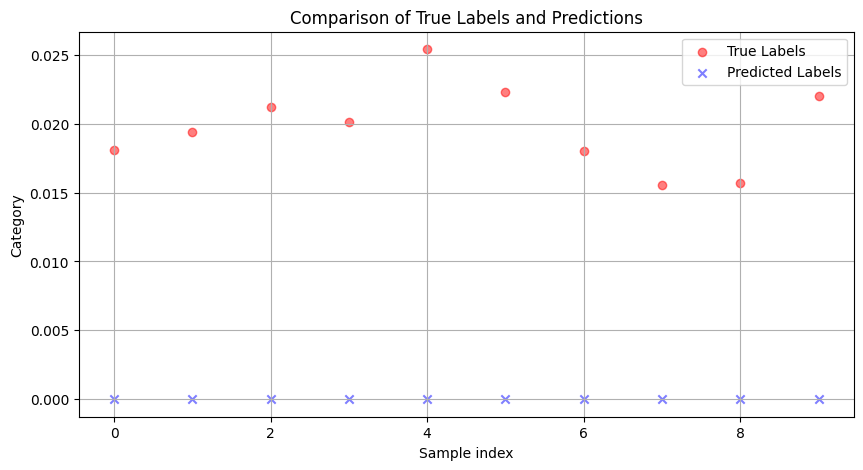

In [31]:
predicted_classes = (predictions > 0.5).astype(int)

# Plotting
plt.figure(figsize=(10, 5))

# True labels
plt.scatter(range(len(labels)), labels, color='red', label='True Labels', alpha=0.5)

# Predicted labels
plt.scatter(range(len(predicted_classes)), predicted_classes, marker='x', color='blue', label='Predicted Labels', alpha=0.5)

plt.title('Comparison of True Labels and Predictions')
plt.xlabel('Sample index')
plt.ylabel('Category')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
loss = model.evaluate(inputs, labels)
print(f"Model loss on the dataset: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7006
Model loss on the dataset: 0.6992741227149963


In [14]:
for layer in model.layers:
    weights = layer.get_weights()  # list of numpy arrays
    print(f"Weights of {layer.name}: {weights}")

Weights of input_layer: []
Weights of dense: [array([[-0.17987137],
       [ 0.36988142],
       [ 0.14594254],
       [ 0.17922866],
       [-0.5248106 ],
       [-0.48947042],
       [-0.1333509 ],
       [ 0.32341063],
       [-0.34967226],
       [ 0.5186384 ]], dtype=float32), array([0.0964781], dtype=float32)]
Weights of activation: []


In [ ]:
def make_quad_model(D):

    input_layer = keras.layers.Input(D)

    linear_layer = keras.layers.Dense(1)(input_layer)

    quadratic_layer = keras.layers.Dense(D,use_bias=False)(input_layer)

    multiply_layer = keras.layers.Multiply()([quadratic_layer,input_layer])

    ones_layer = keras.layers.Dense(1,use_bias=False,trainable=False,kernel_initializer='ones')(multiply_layer)

    add_layer = keras.layers.Add()([linear_layer,ones_layer])

    output_layer = keras.layers.Activation('sigmoid')(add_layer)

    model = keras.models.Model(input_layer,output_layer)

    model.compile(loss='binary_crossentropy')

    return model